In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc
import seaborn as sns

In [2]:
auto = pd.read_csv("auto-mpg.data-original.txt", sep="\s+", names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                                                                     "acceleration", "model_year", "origin", "car_name"])
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
auto.shape[0]

406

In [4]:
auto.drop_duplicates(keep='first', inplace=True)

In [5]:
auto.shape[0]

406

In [6]:
auto.dropna(axis = 0, inplace = True)

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'mpg'),
  Text(2, 0, 'cylinders'),
  Text(3, 0, 'displacement'),
  Text(4, 0, 'horsepower'),
  Text(5, 0, 'weight'),
  Text(6, 0, 'acceleration'),
  Text(7, 0, 'model_year'),
  Text(8, 0, 'origin')])

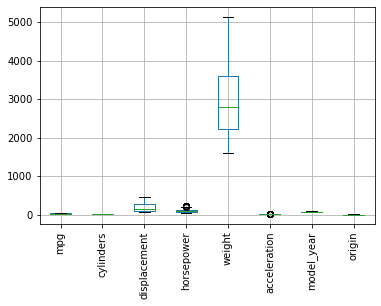

In [7]:
auto.boxplot()
plt.xticks(rotation = 90)

In [8]:
auto['mpg'] = preproc.minmax_scale(auto[['mpg']])
auto['cylinders'] = preproc.minmax_scale(auto[['cylinders']])
auto['displacement'] = preproc.minmax_scale(auto[['displacement']])
auto['horsepower'] = preproc.minmax_scale(auto[['horsepower']])
auto['weight'] = preproc.minmax_scale(auto[['weight']])
auto['acceleration'] = preproc.minmax_scale(auto[['acceleration']])
auto['model_year'] = preproc.minmax_scale(auto[['model_year']])
auto['origin'] = preproc.minmax_scale(auto[['origin']])

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'mpg'),
  Text(2, 0, 'cylinders'),
  Text(3, 0, 'displacement'),
  Text(4, 0, 'horsepower'),
  Text(5, 0, 'weight'),
  Text(6, 0, 'acceleration'),
  Text(7, 0, 'model_year'),
  Text(8, 0, 'origin')])

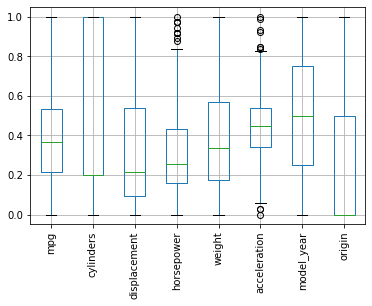

In [9]:
auto.boxplot()
plt.xticks(rotation = 90)

In [10]:
auto.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin          float64
car_name         object
dtype: object

In [11]:
auto["car_name"]=auto["car_name"].astype('category')

In [12]:
auto["car_name"]=auto["car_name"].cat.codes
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,48
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,35
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,229
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,13
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,159
...,...,...,...,...,...,...,...,...,...
401,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,151
402,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5,297
403,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,118
404,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,157


In [13]:
auto["car_name"]=auto["car_name"].astype('float64')

<AxesSubplot:>

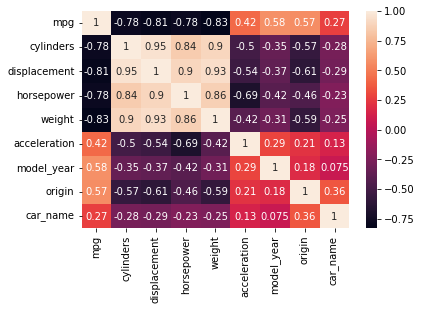

In [14]:
sns.heatmap(auto.corr(), annot = True)

In [15]:
auto.shape

(392, 9)

In [16]:
auto.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model_year      392
origin          392
car_name        392
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X = auto.drop(['mpg'], axis=1)
Y = auto['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [18]:
from sklearn.linear_model import Lasso, LassoCV  # Регрессия лассо, перекрестная проверка LassoCV для достижения альфа-выбора
lasso = LassoCV() # LassoCV автоматически настраивает альфа-канал, чтобы выбрать лучший альфа-канал.
lasso.fit(X_train, Y_train)# Моделирование линейной регрессии
print ('Best alpha:', lasso.alpha_)
lasso_pred = lasso.predict(X_test)# Использовать прогноз модели


Best alpha: 0.004500791998859594


In [19]:
from sklearn.metrics import mean_squared_error
from scipy import stats
print('Error = %8.5f' %mean_squared_error(lasso_pred, Y_test)) #среднеквадратичная ошибка
print('Pearson correl: %8.6f' %stats.pearsonr(lasso_pred, Y_test)[0]) #корреляция по Пирсону
print('p-value:', stats.pearsonr(lasso_pred, Y_test)[1])
print('Spearman correl: %8.6f' %stats.spearmanr(lasso_pred, Y_test)[0]) #корреляция по Спирману
print('p-value:', stats.spearmanr(lasso_pred, Y_test)[1])

Error =  0.00808
Pearson correl: 0.914036
p-value: 2.822477386222598e-47
Spearman correl: 0.950333
p-value: 1.2260922225650153e-60


In [20]:
from sklearn.linear_model import Ridge, RidgeCV
Ridge = RidgeCV()
Ridge.fit(X_train, Y_train)
print('Best alpha: ', Ridge.alpha_)
Ridge_pred = Ridge.predict(X_test)

Best alpha:  0.1


In [21]:
from sklearn.metrics import mean_squared_error
from scipy import stats
print('Error = %8.5f' %mean_squared_error(Ridge_pred, Y_test)) #среднеквадратичная ошибка
print('Pearson correl: %8.6f' %stats.pearsonr(Ridge_pred, Y_test)[0]) #корреляция по Пирсону
print('p-value:', stats.pearsonr(Ridge_pred, Y_test)[1])
print('Spearman correl: %8.6f' %stats.spearmanr(Ridge_pred, Y_test)[0]) #корреляция по Спирману
print('p-value:', stats.spearmanr(Ridge_pred, Y_test)[1])

Error =  0.00790
Pearson correl: 0.915592
p-value: 1.0235526748090419e-47
Spearman correl: 0.953991
p-value: 1.6114125576648261e-62
